## Installing torchfusion and importing other goodies


In [0]:
!pip3 install torchfusion
from torchfusion.gan.learners import *
from torchfusion.gan.applications import StandardGenerator,StandardProjectionDiscriminator
from torch.optim import Adam
from torchfusion.datasets import mnist_loader
import torch.cuda as cuda
import torch.nn as nn


## Using the `StandardGenerator()` and the `StandardProjectionDiscriminator()` 

* `output_size = (color_channels, width, height )` - sets the dimensions of the output image. Set `color_channels = 3 ` for RGB images
* `latent_size` is the number of input channels which act as the "seed" for the generator.
* Make sure the output size of the generator is the same as the input size of the generator 

In [15]:
G = StandardGenerator(output_size=(1,32,32),latent_size=128)
D = StandardProjectionDiscriminator(input_size=(1,32,32),apply_sigmoid=False)
print(G)
print(D)

StandardGenerator(
  (layers): ModuleList(
    (0): StandardGeneratorBlock(
      (activation): LeakyReLU(negative_slope=0.2)
      (conv): ConvTranspose2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): StandardGeneratorBlock(
      (activation): LeakyReLU(negative_slope=0.2)
      (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Dropout(p=0, inplace=False)
    (3): StandardGeneratorBlock(
      (activation): LeakyReLU(negative_slope=0.2)
      (conv): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): Dropout(p=0, inplace=False)
  )
  (final_conv): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padd

## Defining the optimizers and loading the dataset
* MNIST dataset because this is just an experiment 
* increase `num_epochs` for better results
* A smaller latent size gave worse results.

In [0]:
if cuda.is_available():
    G = nn.DataParallel(G.cuda())
    D = nn.DataParallel(D.cuda())

# optimizers
g_optim = Adam(G.parameters(),lr=0.0002,betas=(0.5,0.999))
d_optim = Adam(D.parameters(),lr=0.0002,betas=(0.5,0.999))

In [0]:
#Load the dataset
dataset = mnist_loader(size=32,batch_size=64)

Epoch 1 of 2


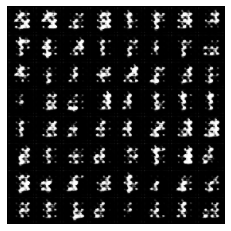

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_1.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_1.pth
Epoch: 1, Duration: 43.4301221370697 , Gen Loss: 5.875738020833333 Disc Loss: 0.05590470377604167
Epoch 2 of 2


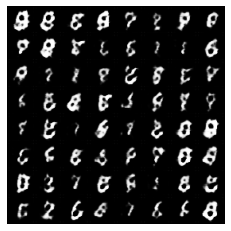

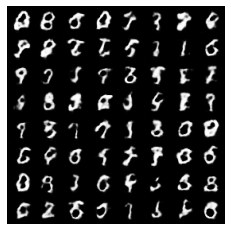

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_2.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_2.pth
Epoch: 2, Duration: 43.001062631607056 , Gen Loss: 3.81704609375 Disc Loss: 0.11252776692708333


In [19]:
learner = RStandardGanLearner(G,D)
learner.train(dataset,gen_optimizer=g_optim,disc_optimizer=d_optim,save_outputs_interval=500,model_dir="./mnist-gan-exp",latent_size=128,num_epochs=2,batch_log=False)

## Now let's try with a higher learning rate  for the discriminator
* This might mean that the discriminator becomes "smarter" than the generator at an early stage
* This would lead to what's called a *mode collapse*. This is when the generator a lot of (possibly garbage ) identical images or very similar images for different points in latent space.



In [0]:
G = StandardGenerator(output_size=(1,32,32),latent_size=128)
D = StandardProjectionDiscriminator(input_size=(1,32,32),apply_sigmoid=False)

if cuda.is_available():
    G = nn.DataParallel(G.cuda())
    D = nn.DataParallel(D.cuda())

g_optim = Adam(G.parameters(),lr=0.0002,betas=(0.5,0.999))
d_optim = Adam(D.parameters(),lr=0.005,betas=(0.5,0.999))  ## Notice the higher LR

Epoch 1 of 2


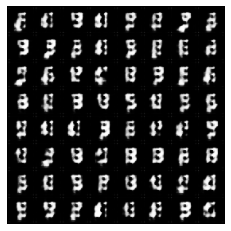

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_1.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_1.pth
Epoch: 1, Duration: 56.61811089515686 , Gen Loss: 4.8595625 Disc Loss: 0.13863653971354167
Epoch 2 of 2


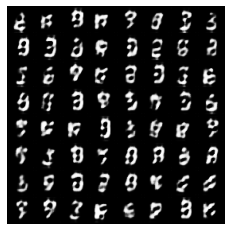

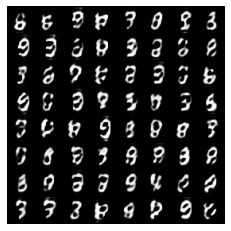

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_2.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_2.pth
Epoch: 2, Duration: 56.35232090950012 , Gen Loss: 0.668088671875 Disc Loss: 0.3197379557291667


In [22]:
learner_new = RStandardGanLearner(G,D)
learner_new.train(dataset,gen_optimizer=g_optim,disc_optimizer=d_optim,save_outputs_interval=500,model_d.ir="./mnist-gan-exp",latent_size=128 ,num_epochs=2,batch_log=False)

## How about a smaller latent size

Latent space, in simpler words would be the set of possible inputs to the generator. And a point in latent space is an input. 

A smaller latent size means a lower dimensional input.

Think of it as a point (point means possible input) in an n-dimensional space. For example, a point in 3d latent space would look like:

$$ input = \begin {bmatrix} a \\ b \\ c \end{bmatrix}$$

Where a,b,c are values which when fed into the generator gives a certain output.

Similar data points lie closer to each other in latent space.

Generally, the generator fails to generate proper images if the latent space is too small. 

In [0]:
smaller_latent_size = 2
G = StandardGenerator(output_size=(1,32,32),latent_size= smaller_latent_size ) ## smaller latent size
D = StandardProjectionDiscriminator(input_size=(1,32,32),apply_sigmoid=False)

if cuda.is_available():
    G = nn.DataParallel(G.cuda())
    D = nn.DataParallel(D.cuda())

g_optim = Adam(G.parameters(),lr=0.0002,betas=(0.5,0.999))
d_optim = Adam(D.parameters(),lr=0.0002,betas=(0.5,0.999))  ## same  LR

Epoch 1 of 2


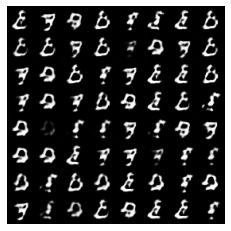

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_1.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_1.pth
Epoch: 1, Duration: 41.75613236427307 , Gen Loss: 2.36833671875 Disc Loss: 0.19324767252604166
Epoch 2 of 2


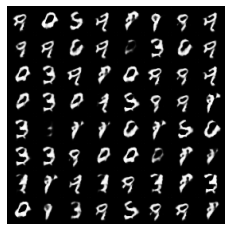

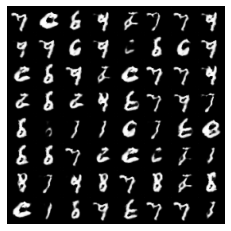

New Generator model saved at ./mnist-gan-exp/gen_models/gen_model_2.pth
New Discriminator model saved at ./mnist-gan-exp/disc_models/disc_model_2.pth
Epoch: 2, Duration: 41.481547355651855 , Gen Loss: 2.5418518229166667 Disc Loss: 0.19158260091145835


In [14]:
learner_new = RStandardGanLearner(G,D)
learner_new.train(dataset,gen_opt.imizer=g_optim,disc_optimizer=d_optim,save_outputs_interval=500,model_dir="./mnist-gan-exp",latent_size= smaller_latent_size ,num_epochs=2,batch_log=False)